In [1]:
from Vissim_env_class import environment
from Actor_critic_class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent

# Network Specific Libraries
from Balance_Functions import balance_dictionary

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Balance

In [ ]:
model_name  = 'Balance'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = "E:\Backup - Onedrive\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim"
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


In [ ]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

In [ ]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

In [ ]:
env.reset()

# Balance DQN Debug

In [ ]:
###############################
## Initialization Parameters ##
###############################

intersection = "1_2_4"
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 9001
timesteps_per_second = 1
agent_type = "DDQN"
#actions_set = 'default_actions'     # 'default_actions' or 'all_actions'
actions_set = 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions_set + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
## Deploy Agents
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)
Balance_int_MultiDQN_Agents.prepopulate_memory()

In [ ]:
# Deploy Environment
env = None
env = environment(model_name, vissim_working_directory, sim_length, partial_dictionary, actions_set,\
                  Random_Seed = Random_Seed, timesteps_per_second = timesteps_per_second, mode = 'debug', delete_results = True, verbose=True)

In [ ]:
## Test to ensure correct deployment of agents

# Test 1: Check number of agents
print(env.SCUs.items())

# Test 2: Check Dictionary for each agent
agent = 0
print("state_type: " + env.SCUs[agent].state_type)
print("state_size: ")
print(env.SCUs[agent].state_size)
print("reward_type: ")
print(env.SCUs[agent].reward_type)
print("compatible_actions: ")
print(env.SCUs[agent].compatible_actions)
print("all_actions: ")
print(env.SCUs[agent].all_actions)
print("Lanes_names: " )
print(env.SCUs[agent].Lanes_names)
print("Links_names: ")
print(env.SCUs[agent].Links_names)
print("time_steps_per_second: " + str(env.SCUs[agent].time_steps_per_second))
print("queues_counter_ID: " )
print(env.SCUs[agent].queues_counter_ID)
print("queues_counters: ")
print(env.SCUs[agent].queues_counters)
print("signal_controller: ")
print(env.SCUs[agent].signal_controller)
print("Signal_Groups: " )
print(env.SCUs[agent].signal_groups)
print("Node: " + str(env.SCUs[agent].Node))

## CORRECT - No apparent issues from this test

In [ ]:
## Tests to ensure correct STATE READING
timesteps = 1
for i in range(timesteps):
    env.Vissim.Simulation.RunSingleStep()

## Test 3: Correct Reading of queues from QUEUE COUNTERS
print("queues_counter_ID: " )
print(env.SCUs[0].queues_counter_ID)
print([env.Vissim.Net.QueueCounters.ItemByKey(i).AttValue('QLen(Current, Last)') for i in env.SCUs[0].queues_counter_ID])
    
# Test 4: Correct Reading of Aggregated Queues by SCU
print(env.SCUs[0].calculate_queues())

## Test 5: Correct Reading of Global Queues by ENVIRONMENT
print(env.get_queues())

## CORRECT - No apparent issues from this test

In [ ]:
## Test 6: Correct Reading of Initial State, and Generation of according actions
start_state = env.get_state()
actions = {}
print("Dict([(Agent_ID, array(state))])")
print(start_state.items())
print("")
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("{Agent_ID : Chosen_Action}")
print(actions)

## CORRECT - No apparent issues from this test

In [ ]:
## Test 7: Correct Reading of General State from SCU and Generation of according actions
SARSDs = env.step_to_next_action(actions)
actions = dict()
for idx , sarsd in SARSDs.items():
    s,a,r,ns,d = sarsd
    
print("Agent_ID: " + str(SARSDs.keys()))
print("Agent_State:")
print(SARSDs[0][0][0])
print("Agent_Action: " + str(SARSDs[0][1]))
print("Agent_Reward: " + str(SARSDs[0][2]))
print("Agent_Next_State:")
print(SARSDs[0][3][0])
print("Done: " + str(SARSDs[0][4]))

## CORRECT - No apparent issues from this test

In [ ]:
## Test 8: Correct operation of signal groups
signal_group = 5
env.SCUs[0].signal_groups[signal_group].SetAttValue("SigState", "GREEN")
env.Vissim.Simulation.RunSingleStep()

## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-1: Correct implementation of actions (SETUP)
for idx, agent in Balance_int_MultiDQN_Agents.Agents.items():
    agent.reset()

start_state = env.get_state()
print("Initial State: {Agent_ID: initual queues}")
print(start_state)
actions = {}
for idx, s in start_state.items():
    actions[idx] = Balance_int_MultiDQN_Agents.Agents[idx].choose_action(s)
print("Initial Choice of Actions: {Agent_ID: action}")    
print(actions)

# That is not a clean way to do this
def to_dictionary(dictionary,idx,value):
    """
    Assign a value to an index in a dictionary
    """
    dictionary[idx] = value
    
## CORRECT - No apparent issues from this test

In [ ]:
###### Test 9-2: Correct implementation of actions (EXECUTION)
##
## ATTENTION: If an "index out of range" is requested, the system will break an will\
##            require a reset. This does not affect normal simulation.

actions[0] = 4
# This is step_to_next_action() function
while not env.action_required:
    
    # This is the step() function
    Sarsd = dict()
    
    # The default position is that no action is required, only a step of simulator
    env.action_required = False
    #print("false 1")
    
    [scu.action_update(actions[0] , green_time = 5 ) for idx, scu in env.SCUs.items() if scu.action_required]
    
    [scu.update() for idx,scu in env.SCUs.items()]
    
    env.Vissim.Simulation.RunSingleStep()
    
    [to_dictionary(Sarsd,idx,scu.sars()+[env.done]) for idx,scu in env.SCUs.items() if scu.action_required ]
    
    if len(Sarsd) > 0 or env.done :
        env.action_required = True
        #print("TRUE")
    
    print(Sarsd)
        
env.action_required = False
#print("false 2")


In [ ]:
## Test 10: Correct changing of phases based on actions

In [ ]:
## Test 11: Correct calculation of rewards

# Balance RL DQN Partial Training

In [2]:
intersection = 3
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\Desktop\\Vissim_RL_Traffic_Lights_Control\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 10
sim_length = 10801
timesteps_per_second = 1
agent_type = "DuelingDDQN"
actions = 'all_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 10

PER_activated = True
memory_size = 10000
batch_size = 256
batches_per_episode = 10

alpha = 0.0005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "2_4":
    intersection = 2
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type + "_Queues"
print("Current simulation: {}".format(Session_ID))

Current simulation: Balance_int3_all_actions_400_10800_DuelingDDQN_Queues


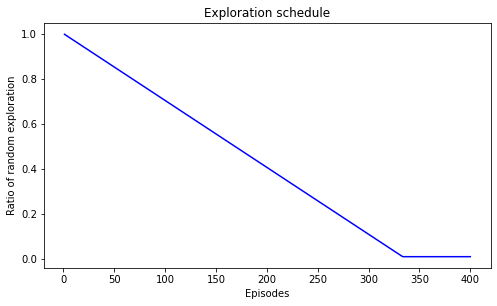

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "linear"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [4]:
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

INTERSECTION 2: SETTING UP AGENT
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 14)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 24)           360         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 24)           600         dense[0][0]                      
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 24)           600         dense_1[0][0]                    
_____________________________________________________________

In [16]:
Balance_int_MultiDQN_Agents.prepopulate_memory()

Experience file not found. Generating now...
Working Directory set to: C:\Users\acabrejasegea\Desktop\Vissim_RL_Traffic_Lights_Control\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int14.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 10
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting

KeyboardInterrupt: 

In [ ]:
Balance_int_MultiDQN_Agents.train(episodes)

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int14.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 10
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deployme

Random Seed Set to 21
Episode 291: Finished running.
Agent 0, Average Reward: -449.57
Train on 256 samples
256/256 - 0s - loss: 79525.4688
Train on 256 samples
256/256 - 0s - loss: 78672.0781
Train on 256 samples
256/256 - 0s - loss: 73064.4375
Train on 256 samples
256/256 - 0s - loss: 75663.1875
Train on 256 samples
256/256 - 0s - loss: 71775.5078
Train on 256 samples
256/256 - 0s - loss: 70579.1250
Train on 256 samples
256/256 - 0s - loss: 72333.2031
Train on 256 samples
256/256 - 0s - loss: 66563.4688
Train on 256 samples
256/256 - 0s - loss: 67633.1016
Train on 256 samples
256/256 - 0s - loss: 61264.8711
Reducing exploration for all agents to 0.3072

Episode 292: Starting computation.
Random Seed Set to 22
Episode 292: Finished running.
Agent 0, Average Reward: -475.19
Train on 256 samples
256/256 - 0s - loss: 62881.9414
Train on 256 samples
256/256 - 0s - loss: 59447.1406
Train on 256 samples
256/256 - 0s - loss: 57381.8438
Train on 256 samples
256/256 - 0s - loss: 52149.5195
Trai

Train on 256 samples
256/256 - 0s - loss: 34105.0156
Train on 256 samples
256/256 - 0s - loss: 32460.9785
Train on 256 samples
256/256 - 0s - loss: 31046.4473
Train on 256 samples
256/256 - 0s - loss: 27252.6113
Train on 256 samples
256/256 - 0s - loss: 26960.4551
Train on 256 samples
256/256 - 0s - loss: 26073.0391
Reducing exploration for all agents to 0.281

Episode 303: Starting computation.
Random Seed Set to 33
Episode 303: Finished running.
Agent 0, Average Reward: -457.76
Train on 256 samples
256/256 - 0s - loss: 22106.6582
Train on 256 samples
256/256 - 0s - loss: 22279.9043
Train on 256 samples
256/256 - 0s - loss: 21600.6113
Train on 256 samples
256/256 - 0s - loss: 19847.9121
Train on 256 samples
256/256 - 0s - loss: 17759.6543
Train on 256 samples
256/256 - 0s - loss: 17907.1543
Train on 256 samples
256/256 - 0s - loss: 18013.5957
Train on 256 samples
256/256 - 0s - loss: 14924.0723
Train on 256 samples
256/256 - 0s - loss: 14471.7441
Train on 256 samples
256/256 - 0s - lo

Train on 256 samples
256/256 - 0s - loss: 19888.8340
Train on 256 samples
256/256 - 0s - loss: 22019.1465
Train on 256 samples
256/256 - 0s - loss: 17878.8613
Train on 256 samples
256/256 - 0s - loss: 15337.7695
Train on 256 samples
256/256 - 0s - loss: 15333.0059
Train on 256 samples
256/256 - 0s - loss: 12717.6211
Train on 256 samples
256/256 - 0s - loss: 12139.7324
Train on 256 samples
256/256 - 0s - loss: 11092.4834
Train on 256 samples
256/256 - 0s - loss: 9629.1211
Reducing exploration for all agents to 0.2524

Episode 315: Starting computation.
Random Seed Set to 45
Episode 315: Finished running.
Agent 0, Average Reward: -630.3
Train on 256 samples
256/256 - 0s - loss: 9892.2188
Train on 256 samples
256/256 - 0s - loss: 15237.3945
Train on 256 samples
256/256 - 0s - loss: 11299.6484
Train on 256 samples
256/256 - 0s - loss: 8340.5918
Train on 256 samples
256/256 - 0s - loss: 8368.0713
Train on 256 samples
256/256 - 0s - loss: 9696.9502
Train on 256 samples
256/256 - 0s - loss: 1

Train on 256 samples
256/256 - 0s - loss: 3638.8503
Train on 256 samples
256/256 - 0s - loss: 2215.8872
Reducing exploration for all agents to 0.2263

Episode 326: Starting computation.
Random Seed Set to 56
Episode 326: Finished running.
Agent 0, Average Reward: -451.97
Train on 256 samples
256/256 - 0s - loss: 1256.0546
Train on 256 samples
256/256 - 0s - loss: 1645.5659
Train on 256 samples
256/256 - 0s - loss: 1581.5387
Train on 256 samples
256/256 - 0s - loss: 1398.5730
Train on 256 samples
256/256 - 0s - loss: 1451.7605
Train on 256 samples
256/256 - 0s - loss: 1129.4626
Train on 256 samples
256/256 - 0s - loss: 1403.7688
Train on 256 samples
256/256 - 0s - loss: 2457.1804
Train on 256 samples
256/256 - 0s - loss: 2169.4102
Train on 256 samples
256/256 - 0s - loss: 1471.4410
Reducing exploration for all agents to 0.2239

Episode 327: Starting computation.
Random Seed Set to 57
Episode 327: Finished running.
Agent 0, Average Reward: -408.42
Saving architecture, weights, optimizer 

Train on 256 samples
256/256 - 0s - loss: 10837.0117
Train on 256 samples
256/256 - 0s - loss: 14760.5566
Train on 256 samples
256/256 - 0s - loss: 6531.3374
Train on 256 samples
256/256 - 0s - loss: 13918.2949
Train on 256 samples
256/256 - 0s - loss: 6084.7734
Train on 256 samples
256/256 - 0s - loss: 19254.7207
Train on 256 samples
256/256 - 0s - loss: 15571.5742
Reducing exploration for all agents to 0.1977

Episode 338: Starting computation.
Random Seed Set to 68
Episode 338: Finished running.
Agent 0, Average Reward: -1026.43
Train on 256 samples
256/256 - 0s - loss: 10113.8125
Train on 256 samples
256/256 - 0s - loss: 11578.2646
Train on 256 samples
256/256 - 0s - loss: 13438.2129
Train on 256 samples
256/256 - 0s - loss: 7409.9917
Train on 256 samples
256/256 - 0s - loss: 8173.7817
Train on 256 samples
256/256 - 0s - loss: 25407.8457
Train on 256 samples
256/256 - 0s - loss: 4711.9082
Train on 256 samples
256/256 - 0s - loss: 10974.2803
Train on 256 samples
256/256 - 0s - loss:

Train on 256 samples
256/256 - 0s - loss: 12894.4307
Reducing exploration for all agents to 0.1715

Episode 349: Starting computation.
Random Seed Set to 79
Episode 349: Finished running.
Agent 0, Average Reward: -1171.93
Train on 256 samples
256/256 - 0s - loss: 19455.6641
Train on 256 samples
256/256 - 0s - loss: 14483.8350
Train on 256 samples
256/256 - 0s - loss: 41927.3711
Train on 256 samples
256/256 - 0s - loss: 32984.5078
Train on 256 samples
256/256 - 0s - loss: 21908.8867
Train on 256 samples
256/256 - 0s - loss: 20449.3730
Train on 256 samples
256/256 - 0s - loss: 23613.2070
Train on 256 samples
256/256 - 0s - loss: 30076.3184
Train on 256 samples
256/256 - 0s - loss: 23707.7773
Train on 256 samples
256/256 - 0s - loss: 11112.0225
Reducing exploration for all agents to 0.1691

Episode 350: Starting computation.
Random Seed Set to 80
Episode 350: Finished running.
Agent 0, Average Reward: -567.66
Train on 256 samples
256/256 - 0s - loss: 27916.0820
Train on 256 samples
256/25

Train on 256 samples
256/256 - 0s - loss: 45048.0625
Train on 256 samples
256/256 - 0s - loss: 50932.6992
Train on 256 samples
256/256 - 0s - loss: 32295.2812
Train on 256 samples
256/256 - 0s - loss: 35926.9609
Train on 256 samples
256/256 - 0s - loss: 38720.0859
Weights succesfully copied to Target model for Agent 13.
Saving architecture, weights and optimizer state for agent-13
Dumping agent-13 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.1429

Episode 361: Starting computation.
Random Seed Set to 91
Episode 361: Finished running.
Agent 0, Average Reward: -1032.48
Train on 256 samples
256/256 - 0s - loss: 199824.1719
Train on 256 samples
256/256 - 0s - loss: 192754.9531
Train on 256 samples
256/256 - 0s - loss: 153009.6406
Train on 256 samples
256/256 - 0s - loss: 142605.1094
Train on 256 samples
256/256 - 0s - loss: 94865.3750
Train on 256 samples
256/256 - 0s - loss: 113897.9766
T

Train on 256 samples
256/256 - 0s - loss: 27202.5918
Reducing exploration for all agents to 0.1167

Episode 372: Starting computation.
Random Seed Set to 102
Episode 372: Finished running.
Agent 0, Average Reward: -425.58
Train on 256 samples
256/256 - 0s - loss: 30369.1426
Train on 256 samples
256/256 - 0s - loss: 16327.9629
Train on 256 samples
256/256 - 0s - loss: 20183.1406
Train on 256 samples
256/256 - 0s - loss: 15844.7119
Train on 256 samples
256/256 - 0s - loss: 24303.0137
Train on 256 samples
256/256 - 0s - loss: 22854.4727
Train on 256 samples
256/256 - 0s - loss: 25654.1328
Train on 256 samples
256/256 - 0s - loss: 11473.2803
Train on 256 samples
256/256 - 0s - loss: 14463.7480
Train on 256 samples
256/256 - 0s - loss: 19393.7812
Reducing exploration for all agents to 0.1144

Episode 373: Starting computation.
Random Seed Set to 103
Episode 373: Finished running.
Agent 0, Average Reward: -650.72
Train on 256 samples
256/256 - 0s - loss: 11398.0264
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 34696.3242
Train on 256 samples
256/256 - 0s - loss: 22278.3887
Train on 256 samples
256/256 - 0s - loss: 39216.1797
Train on 256 samples
256/256 - 0s - loss: 70808.2578
Train on 256 samples
256/256 - 0s - loss: 65904.9375
Train on 256 samples
256/256 - 0s - loss: 68212.5547
Train on 256 samples
256/256 - 0s - loss: 18903.2070
Train on 256 samples
256/256 - 0s - loss: 21577.2539
Reducing exploration for all agents to 0.0882

Episode 384: Starting computation.
Random Seed Set to 114
Episode 384: Finished running.
Agent 0, Average Reward: -449.17
Train on 256 samples
256/256 - 0s - loss: 28310.5742
Train on 256 samples
256/256 - 0s - loss: 40845.6406
Train on 256 samples
256/256 - 0s - loss: 20960.4902
Train on 256 samples
256/256 - 0s - loss: 45638.5664
Train on 256 samples
256/256 - 0s - loss: 51066.2031
Train on 256 samples
256/256 - 0s - loss: 18073.4492
Train on 256 samples
256/256 - 0s - loss: 36339.0898
Train on 256 samples
256/256 - 0s - 

Random Seed Set to 125
Episode 395: Finished running.
Agent 0, Average Reward: -695.37
Train on 256 samples
256/256 - 0s - loss: 16763.2656
Train on 256 samples
256/256 - 0s - loss: 32876.7148
Train on 256 samples
256/256 - 0s - loss: 13136.4160
Train on 256 samples
256/256 - 0s - loss: 6473.9517
Train on 256 samples
256/256 - 0s - loss: 33038.8945
Train on 256 samples
256/256 - 0s - loss: 11298.0947
Train on 256 samples
256/256 - 0s - loss: 6647.0854
Train on 256 samples
256/256 - 0s - loss: 32526.1777
Train on 256 samples
256/256 - 0s - loss: 6372.2363
Train on 256 samples
256/256 - 0s - loss: 49225.7344
Reducing exploration for all agents to 0.0596

Episode 396: Starting computation.


In [ ]:
Balance_int_MultiDQN_Agents.save(episodes)

In [ ]:
Balance_int_MultiDQN_Agents.demo()

In [ ]:
## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    #plt.yscale('log')

    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    

In [21]:
Balance_int_MultiDQN_Agents.load(1000, best = True)

Loading Pre-Trained Agent 2, Architecture, Optimizer and Memory.
C:\Users\acabrejasegea\Desktop\Vissim_RL_Traffic_Lights_Control\Vissim\Balance_int3\Agents_Results\DuelingDDQN\Balance_int3_all_actions_400_10800_DuelingDDQN_Queues\BestAgent2.h5


ValueError: bad marshal data (unknown type code)

In [22]:
from collections import deque
import numpy as np
import random
import PER

from General_agent import RLAgent

import tensorflow as tf
import tensorflow.keras.layers as kl

import tensorflow.keras.losses as kls
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.losses as kls
from tensorflow.keras import regularizers
from tensorflow.keras.activations import relu

In [34]:
Dueling=True
def _build_model(Dueling):
    '''
    This method builds the neural network at the core of the agent
    '''
    if Dueling:
        # Architecture for the Neural Net in the Dueling Deep Q-Learning Model
        #model = Sequential()
        input_layer = Input(shape = state_size )
        # conv1 = kl.Conv2D(32, (3, 3), activation= 'relu', padding='same', kernel_regularizer=regularizers.l2(0.001), name = 'value_conv1')(input_layer)
        # conv2 = kl.Conv2D(64, (3, 3), activation= 'relu', padding='same', kernel_regularizer=regularizers.l2(0.001), name = 'value_conv2')(conv1)
        # conv3 = kl.Conv2D(64, (3, 3), activation= 'relu', padding='same', kernel_regularizer=regularizers.l2(0.001), name = 'value_conv3')(conv2)
        # flatten = Flatten()(conv3)
        dense1 = Dense(24, activation= 'relu', kernel_regularizer=regularizers.l2(0.001))(input_layer)
        dense2 = Dense(24, activation= 'relu', kernel_regularizer=regularizers.l2(0.001))(dense1)
        
        fc1 = Dense(24)(dense2)
        dueling_actions = Dense(action_size,kernel_regularizer=regularizers.l2(0.001))(fc1)
        fc2 = Dense(24)(dense2)
        dueling_values = Dense(1,kernel_regularizer=regularizers.l2(0.001))(fc2)

        def dueling_operator(duel_input):
            duel_v = duel_input[0]
            duel_a = duel_input[1]
            return (duel_v + (duel_a - K.mean(duel_a, axis = 1, keepdims = True)))

        policy = Lambda(dueling_operator, name = 'policy')([dueling_values, dueling_actions])
        model = Model(inputs=[input_layer], outputs=[policy])
        model.compile(loss='mse', optimizer=Adam(lr=learning_rate))
        return(model)
    

In [35]:
state_size = 14
action_size =8
learning_rate = .00001

In [36]:
model = _build_model(Dueling)


In [37]:
model.load_weights("C:\\Users\\acabrejasegea\\Desktop\\Vissim_RL_Traffic_Lights_Control\\Vissim\\Balance_int3\\Agents_Results\\DuelingDDQN\\Balance_int3_all_actions_1000_10800_DuelingDDQN_Queues\\BestAgent2.h5")

In [40]:
Balance_int_MultiDQN_Agents.Agents[0].model = model

In [43]:
Balance_int_MultiDQN_Agents.demo()

Working Directory set to: C:\Users\acabrejasegea\Desktop\Vissim_RL_Traffic_Lights_Control\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int3.inpx ...
Model File load process successful.
Simulation length set to 10801 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 10
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: demo
Starting Deployments of Signal Control Units...
SCUs succe

In [ ]:
Balance_int_MultiDQN_Agents.test()

In [ ]:
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Balance_int_MultiDQN_Agents.Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



Current simulation: Balance_int14_all_actions_500_10800_DuellingDDQN_Queues_rework


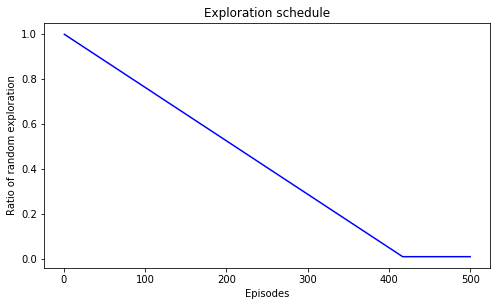

INTERSECTION 13: SETTING UP AGENT
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 24)           168         input_3[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 24)           600         dense_12[0][0]                   
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 24)           600         dense_13[0][0]                   
__________________________________________________________

Train on 256 samples
256/256 - 0s - loss: 187653.8750
Train on 256 samples
256/256 - 0s - loss: 184105.8906
Train on 256 samples
256/256 - 0s - loss: 185486.3438
Train on 256 samples
256/256 - 0s - loss: 174997.7344
Train on 256 samples
256/256 - 0s - loss: 179753.5469
Train on 256 samples
256/256 - 0s - loss: 176836.7188
Train on 256 samples
256/256 - 0s - loss: 171620.7656
Reducing exploration for all agents to 0.9905

Episode 5: Starting computation.
Random Seed Set to 15
Episode 5: Finished running.
Agent 0, Average Reward: -803.36
Train on 256 samples
256/256 - 0s - loss: 178657.1406
Train on 256 samples
256/256 - 0s - loss: 173613.7656
Train on 256 samples
256/256 - 0s - loss: 170873.7500
Train on 256 samples
256/256 - 0s - loss: 171871.6094
Train on 256 samples
256/256 - 0s - loss: 168860.5469
Train on 256 samples
256/256 - 0s - loss: 161218.1250
Train on 256 samples
256/256 - 0s - loss: 160240.6406
Train on 256 samples
256/256 - 0s - loss: 159855.4844
Train on 256 samples
256/2

Random Seed Set to 26
Episode 16: Finished running.
Agent 0, Average Reward: -759.83
Train on 256 samples
256/256 - 0s - loss: 6048.6826
Train on 256 samples
256/256 - 0s - loss: 5042.8667
Train on 256 samples
256/256 - 0s - loss: 6715.4194
Train on 256 samples
256/256 - 0s - loss: 5568.0483
Train on 256 samples
256/256 - 0s - loss: 5602.8955
Train on 256 samples
256/256 - 0s - loss: 6112.4741
Train on 256 samples
256/256 - 0s - loss: 6208.6538
Train on 256 samples
256/256 - 0s - loss: 6435.8101
Train on 256 samples
256/256 - 0s - loss: 5192.5918
Train on 256 samples
256/256 - 0s - loss: 5950.2422
Reducing exploration for all agents to 0.9619

Episode 17: Starting computation.
Random Seed Set to 27
Episode 17: Finished running.
Agent 0, Average Reward: -784.95
Train on 256 samples
256/256 - 0s - loss: 3968.0222
Train on 256 samples
256/256 - 0s - loss: 3828.2415
Train on 256 samples
256/256 - 0s - loss: 3618.2371
Train on 256 samples
256/256 - 0s - loss: 3947.2290
Train on 256 samples


Train on 256 samples
256/256 - 0s - loss: 5116.6318
Train on 256 samples
256/256 - 0s - loss: 6448.4824
Train on 256 samples
256/256 - 0s - loss: 5973.7739
Train on 256 samples
256/256 - 0s - loss: 4341.5903
Train on 256 samples
256/256 - 0s - loss: 5474.1343
Train on 256 samples
256/256 - 0s - loss: 5379.4888
Reducing exploration for all agents to 0.9357

Episode 28: Starting computation.
Random Seed Set to 38
Episode 28: Finished running.
Agent 0, Average Reward: -632.9
Train on 256 samples
256/256 - 0s - loss: 7249.6157
Train on 256 samples
256/256 - 0s - loss: 7063.2544
Train on 256 samples
256/256 - 0s - loss: 4162.3872
Train on 256 samples
256/256 - 0s - loss: 5463.7676
Train on 256 samples
256/256 - 0s - loss: 4535.9517
Train on 256 samples
256/256 - 0s - loss: 5533.6284
Train on 256 samples
256/256 - 0s - loss: 8315.3096
Train on 256 samples
256/256 - 0s - loss: 4833.6602
Train on 256 samples
256/256 - 0s - loss: 5433.1226
Train on 256 samples
256/256 - 0s - loss: 5069.2046
Red

Episode 39: Finished running.
Agent 0, Average Reward: -600.08
Train on 256 samples
256/256 - 0s - loss: 12414.9756
Train on 256 samples
256/256 - 0s - loss: 11002.7930
Train on 256 samples
256/256 - 0s - loss: 6763.8330
Train on 256 samples
256/256 - 0s - loss: 9293.2695
Train on 256 samples
256/256 - 0s - loss: 7176.0776
Train on 256 samples
256/256 - 0s - loss: 7425.5405
Train on 256 samples
256/256 - 0s - loss: 7512.6680
Train on 256 samples
256/256 - 0s - loss: 7761.9941
Train on 256 samples
256/256 - 0s - loss: 6608.3457
Train on 256 samples
256/256 - 0s - loss: 7297.7197
Reducing exploration for all agents to 0.9072

Episode 40: Starting computation.
Random Seed Set to 50
Episode 40: Finished running.
Agent 0, Average Reward: -726.4
Train on 256 samples
256/256 - 0s - loss: 11264.8682
Train on 256 samples
256/256 - 0s - loss: 7013.2188
Train on 256 samples
256/256 - 0s - loss: 6025.9111
Train on 256 samples
256/256 - 0s - loss: 9166.7178
Train on 256 samples
256/256 - 0s - loss:

Train on 256 samples
256/256 - 0s - loss: 31829.8535
Train on 256 samples
256/256 - 0s - loss: 16357.7559
Train on 256 samples
256/256 - 0s - loss: 10552.5713
Train on 256 samples
256/256 - 0s - loss: 8549.7002
Train on 256 samples
256/256 - 0s - loss: 13719.8740
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.881

Episode 51: Starting computation.
Random Seed Set to 61
Episode 51: Finished running.
Agent 0, Average Reward: -687.43
Train on 256 samples
256/256 - 0s - loss: 109249.0547
Train on 256 samples
256/256 - 0s - loss: 109099.0156
Train on 256 samples
256/256 - 0s - loss: 106595.4609
Train on 256 samples
256/256 - 0s - loss: 91012.2422
Train on 256 samples
256/256 - 0s - loss: 83695.0703
Train on 256 samples
256/256 - 0s - loss: 69811.2969
Train on 256 samples
256/256 - 0s - loss: 52923.9688
Train on 256 samples
256/256 - 0s - loss: 42987.0898
Train on 256 samples
256/256 - 0s - loss: 37812.3555
Train on 256 samples
256/256 - 0s 

Train on 256 samples
256/256 - 0s - loss: 28423.2500
Train on 256 samples
256/256 - 0s - loss: 22439.2988
Reducing exploration for all agents to 0.8548

Episode 62: Starting computation.
Random Seed Set to 72
Episode 62: Finished running.
Agent 0, Average Reward: -449.26
Saving architecture, weights, optimizer state for best agent-13
Train on 256 samples
256/256 - 0s - loss: 27549.4512
Train on 256 samples
256/256 - 0s - loss: 20010.8965
Train on 256 samples
256/256 - 0s - loss: 15163.1777
Train on 256 samples
256/256 - 0s - loss: 14873.0244
Train on 256 samples
256/256 - 0s - loss: 18936.1270
Train on 256 samples
256/256 - 0s - loss: 19464.2832
Train on 256 samples
256/256 - 0s - loss: 30526.3477
Train on 256 samples
256/256 - 0s - loss: 24004.4785
Train on 256 samples
256/256 - 0s - loss: 28205.2793
Train on 256 samples
256/256 - 0s - loss: 36589.1680
Reducing exploration for all agents to 0.8524

Episode 63: Starting computation.
Random Seed Set to 73
Episode 63: Finished running.
A

Train on 256 samples
256/256 - 0s - loss: 33177.1719
Train on 256 samples
256/256 - 0s - loss: 26089.7598
Train on 256 samples
256/256 - 0s - loss: 44873.8945
Train on 256 samples
256/256 - 0s - loss: 27014.4199
Train on 256 samples
256/256 - 0s - loss: 24660.7793
Train on 256 samples
256/256 - 0s - loss: 34313.0000
Train on 256 samples
256/256 - 0s - loss: 24694.3223
Reducing exploration for all agents to 0.8262

Episode 74: Starting computation.
Random Seed Set to 84
Episode 74: Finished running.
Agent 0, Average Reward: -503.82
Train on 256 samples
256/256 - 0s - loss: 25062.6582
Train on 256 samples
256/256 - 0s - loss: 31249.1992
Train on 256 samples
256/256 - 0s - loss: 26680.4629
Train on 256 samples
256/256 - 0s - loss: 29272.8750
Train on 256 samples
256/256 - 0s - loss: 30497.8770
Train on 256 samples
256/256 - 0s - loss: 28475.2012
Train on 256 samples
256/256 - 0s - loss: 23049.7969
Train on 256 samples
256/256 - 0s - loss: 26024.0215
Train on 256 samples
256/256 - 0s - los

256/256 - 0s - loss: 31490.4473
Train on 256 samples
256/256 - 0s - loss: 24635.0664
Train on 256 samples
256/256 - 0s - loss: 20820.0078
Reducing exploration for all agents to 0.8

Episode 85: Starting computation.
Random Seed Set to 95
Episode 85: Finished running.
Agent 0, Average Reward: -441.99
Saving architecture, weights, optimizer state for best agent-13
Train on 256 samples
256/256 - 0s - loss: 28749.7344
Train on 256 samples
256/256 - 0s - loss: 32376.1562
Train on 256 samples
256/256 - 0s - loss: 21472.6484
Train on 256 samples
256/256 - 0s - loss: 23832.9746
Train on 256 samples
256/256 - 0s - loss: 21626.9219
Train on 256 samples
256/256 - 0s - loss: 25327.5781
Train on 256 samples
256/256 - 0s - loss: 27395.4609
Train on 256 samples
256/256 - 0s - loss: 22741.8789
Train on 256 samples
256/256 - 0s - loss: 30274.0156
Train on 256 samples
256/256 - 0s - loss: 21708.7422
Reducing exploration for all agents to 0.7976

Episode 86: Starting computation.
Random Seed Set to 96
Ep

Train on 256 samples
256/256 - 0s - loss: 26617.5137
Train on 256 samples
256/256 - 0s - loss: 22491.1523
Train on 256 samples
256/256 - 0s - loss: 60625.6328
Train on 256 samples
256/256 - 0s - loss: 33263.7305
Train on 256 samples
256/256 - 0s - loss: 24429.2109
Train on 256 samples
256/256 - 0s - loss: 26286.7832
Train on 256 samples
256/256 - 0s - loss: 22779.7109
Train on 256 samples
256/256 - 0s - loss: 24821.5742
Train on 256 samples
256/256 - 0s - loss: 30890.6699
Reducing exploration for all agents to 0.7714

Episode 97: Starting computation.
Random Seed Set to 107
Episode 97: Finished running.
Agent 0, Average Reward: -475.69
Train on 256 samples
256/256 - 0s - loss: 50167.6875
Train on 256 samples
256/256 - 0s - loss: 46629.1992
Train on 256 samples
256/256 - 0s - loss: 29628.5703
Train on 256 samples
256/256 - 0s - loss: 34441.6328
Train on 256 samples
256/256 - 0s - loss: 30654.0391
Train on 256 samples
256/256 - 0s - loss: 25783.2070
Train on 256 samples
256/256 - 0s - lo

Train on 256 samples
256/256 - 0s - loss: 27650.2656
Train on 256 samples
256/256 - 0s - loss: 47438.7148
Train on 256 samples
256/256 - 0s - loss: 25810.9805
Reducing exploration for all agents to 0.7453

Episode 108: Starting computation.
Random Seed Set to 118
Episode 108: Finished running.
Agent 0, Average Reward: -443.64
Train on 256 samples
256/256 - 0s - loss: 35557.7227
Train on 256 samples
256/256 - 0s - loss: 41510.1836
Train on 256 samples
256/256 - 0s - loss: 26918.8848
Train on 256 samples
256/256 - 0s - loss: 24696.3516
Train on 256 samples
256/256 - 0s - loss: 29297.1289
Train on 256 samples
256/256 - 0s - loss: 54473.2305
Train on 256 samples
256/256 - 0s - loss: 25587.5625
Train on 256 samples
256/256 - 0s - loss: 29957.6211
Train on 256 samples
256/256 - 0s - loss: 29374.0977
Train on 256 samples
256/256 - 0s - loss: 21743.9629
Reducing exploration for all agents to 0.7429

Episode 109: Starting computation.
Random Seed Set to 119
Episode 109: Finished running.
Agent 

Train on 256 samples
256/256 - 0s - loss: 29293.0449
Train on 256 samples
256/256 - 0s - loss: 57127.1758
Train on 256 samples
256/256 - 0s - loss: 29830.5449
Train on 256 samples
256/256 - 0s - loss: 30237.4609
Train on 256 samples
256/256 - 0s - loss: 33929.2070
Train on 256 samples
256/256 - 0s - loss: 25740.2129
Train on 256 samples
256/256 - 0s - loss: 29381.5430
Reducing exploration for all agents to 0.7167

Episode 120: Starting computation.
Random Seed Set to 130
Episode 120: Finished running.
Agent 0, Average Reward: -487.48
Train on 256 samples
256/256 - 0s - loss: 28972.0957
Train on 256 samples
256/256 - 0s - loss: 28001.1582
Train on 256 samples
256/256 - 0s - loss: 28661.3184
Train on 256 samples
256/256 - 0s - loss: 30455.0117
Train on 256 samples
256/256 - 0s - loss: 29199.2051
Train on 256 samples
256/256 - 0s - loss: 41593.9023
Train on 256 samples
256/256 - 0s - loss: 30535.4395
Train on 256 samples
256/256 - 0s - loss: 28266.1895
Train on 256 samples
256/256 - 0s - 

Train on 256 samples
256/256 - 0s - loss: 24198.5254
Train on 256 samples
256/256 - 0s - loss: 22255.1484
Train on 256 samples
256/256 - 0s - loss: 34132.7500
Train on 256 samples
256/256 - 0s - loss: 23057.4473
Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.6905

Episode 131: Starting computation.
Random Seed Set to 141
Episode 131: Finished running.
Agent 0, Average Reward: -443.18
Train on 256 samples
256/256 - 0s - loss: 47273.0547
Train on 256 samples
256/256 - 0s - loss: 34806.7109
Train on 256 samples
256/256 - 0s - loss: 34199.8047
Train on 256 samples
256/256 - 0s - loss: 34590.1328
Train on 256 samples
256/256 - 0s - loss: 35652.0898
Train on 256 samples
256/256 - 0s - loss: 29350.7441
Train on 256 samples
256/256 - 0s - loss: 23100.4355
Train on 256 samples
256/256 - 0s - loss: 35695.2422
Train on 256 samples
256/256 - 0s - loss: 25639.7930
Train on 256 samples
256/256 - 0s - loss: 29195.6035
Reducing exploration for all age

Reducing exploration for all agents to 0.6643

Episode 142: Starting computation.
Random Seed Set to 152
Episode 142: Finished running.
Agent 0, Average Reward: -691.08
Train on 256 samples
256/256 - 0s - loss: 37607.9258
Train on 256 samples
256/256 - 0s - loss: 35110.2383
Train on 256 samples
256/256 - 0s - loss: 26399.1367
Train on 256 samples
256/256 - 0s - loss: 51301.1016
Train on 256 samples
256/256 - 0s - loss: 35850.9688
Train on 256 samples
256/256 - 0s - loss: 30347.2695
Train on 256 samples
256/256 - 0s - loss: 37426.1562
Train on 256 samples
256/256 - 0s - loss: 42313.0938
Train on 256 samples
256/256 - 0s - loss: 29093.7168
Train on 256 samples
256/256 - 0s - loss: 34070.8203
Reducing exploration for all agents to 0.6619

Episode 143: Starting computation.
Random Seed Set to 153
Episode 143: Finished running.
Agent 0, Average Reward: -447.79
Train on 256 samples
256/256 - 0s - loss: 25418.6816
Train on 256 samples
256/256 - 0s - loss: 26036.3633
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 28462.9668
Train on 256 samples
256/256 - 0s - loss: 34860.2891
Train on 256 samples
256/256 - 0s - loss: 28666.4277
Train on 256 samples
256/256 - 0s - loss: 24001.3828
Train on 256 samples
256/256 - 0s - loss: 22780.6484
Reducing exploration for all agents to 0.6357

Episode 154: Starting computation.
Random Seed Set to 164
Episode 154: Finished running.
Agent 0, Average Reward: -438.14
Train on 256 samples
256/256 - 0s - loss: 27001.9805
Train on 256 samples
256/256 - 0s - loss: 27845.5703
Train on 256 samples
256/256 - 0s - loss: 33430.8789
Train on 256 samples
256/256 - 0s - loss: 25618.0781
Train on 256 samples
256/256 - 0s - loss: 35840.0781
Train on 256 samples
256/256 - 0s - loss: 27458.0039
Train on 256 samples
256/256 - 0s - loss: 18063.7969
Train on 256 samples
256/256 - 0s - loss: 26600.5820
Train on 256 samples
256/256 - 0s - loss: 22509.9297
Train on 256 samples
256/256 - 0s - loss: 22126.5293
Reducing exploration for all agents 

Train on 256 samples
256/256 - 0s - loss: 29651.8262
Reducing exploration for all agents to 0.6096

Episode 165: Starting computation.
Random Seed Set to 175
Episode 165: Finished running.
Agent 0, Average Reward: -440.97
Train on 256 samples
256/256 - 0s - loss: 27092.5762
Train on 256 samples
256/256 - 0s - loss: 24975.1348
Train on 256 samples
256/256 - 0s - loss: 26703.2617
Train on 256 samples
256/256 - 0s - loss: 20994.7734
Train on 256 samples
256/256 - 0s - loss: 26786.4805
Train on 256 samples
256/256 - 0s - loss: 36308.9453
Train on 256 samples
256/256 - 0s - loss: 31714.8887
Train on 256 samples
256/256 - 0s - loss: 40827.8008
Train on 256 samples
256/256 - 0s - loss: 24441.5625
Train on 256 samples
256/256 - 0s - loss: 42570.3125
Reducing exploration for all agents to 0.6072

Episode 166: Starting computation.
Random Seed Set to 176
Episode 166: Finished running.
Agent 0, Average Reward: -456.98
Train on 256 samples
256/256 - 0s - loss: 43218.1562
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 30648.3828
Train on 256 samples
256/256 - 0s - loss: 20242.3574
Train on 256 samples
256/256 - 0s - loss: 23711.6113
Train on 256 samples
256/256 - 0s - loss: 25516.5156
Train on 256 samples
256/256 - 0s - loss: 26613.4141
Train on 256 samples
256/256 - 0s - loss: 28860.8789
Reducing exploration for all agents to 0.581

Episode 177: Starting computation.
Random Seed Set to 187
Episode 177: Finished running.
Agent 0, Average Reward: -447.81
Train on 256 samples
256/256 - 0s - loss: 24130.1426
Train on 256 samples
256/256 - 0s - loss: 29676.2773
Train on 256 samples
256/256 - 0s - loss: 23318.7617
Train on 256 samples
256/256 - 0s - loss: 28121.5781
Train on 256 samples
256/256 - 0s - loss: 16272.2305
Train on 256 samples
256/256 - 0s - loss: 21531.0273
Train on 256 samples
256/256 - 0s - loss: 23461.1387
Train on 256 samples
256/256 - 0s - loss: 26268.9160
Train on 256 samples
256/256 - 0s - loss: 20607.3438
Train on 256 samples
256/256 - 0s - l

Train on 256 samples
256/256 - 0s - loss: 28393.4238
Reducing exploration for all agents to 0.5548

Episode 188: Starting computation.
Random Seed Set to 198
Episode 188: Finished running.
Agent 0, Average Reward: -436.67
Train on 256 samples
256/256 - 0s - loss: 23135.4707
Train on 256 samples
256/256 - 0s - loss: 30799.8125
Train on 256 samples
256/256 - 0s - loss: 26147.3750
Train on 256 samples
256/256 - 0s - loss: 25813.0098
Train on 256 samples
256/256 - 0s - loss: 16763.7812
Train on 256 samples
256/256 - 0s - loss: 23740.3750
Train on 256 samples
256/256 - 0s - loss: 17719.2559
Train on 256 samples
256/256 - 0s - loss: 26345.3496
Train on 256 samples
256/256 - 0s - loss: 24315.7559
Train on 256 samples
256/256 - 0s - loss: 32891.7188
Reducing exploration for all agents to 0.5524

Episode 189: Starting computation.
Random Seed Set to 199
Episode 189: Finished running.
Agent 0, Average Reward: -438.87
Train on 256 samples
256/256 - 0s - loss: 25252.9473
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 28227.2090
Train on 256 samples
256/256 - 0s - loss: 16493.2676
Train on 256 samples
256/256 - 0s - loss: 25222.0625
Train on 256 samples
256/256 - 0s - loss: 32883.5664
Train on 256 samples
256/256 - 0s - loss: 24863.7949
Reducing exploration for all agents to 0.5262

Episode 200: Starting computation.
Random Seed Set to 210
Episode 200: Finished running.
Agent 0, Average Reward: -437.73
Train on 256 samples
256/256 - 0s - loss: 28128.7070
Train on 256 samples
256/256 - 0s - loss: 23130.3340
Train on 256 samples
256/256 - 0s - loss: 20417.8457
Train on 256 samples
256/256 - 0s - loss: 24828.3926
Train on 256 samples
256/256 - 0s - loss: 19325.5059
Train on 256 samples
256/256 - 0s - loss: 24751.3418
Train on 256 samples
256/256 - 0s - loss: 25181.1562
Train on 256 samples
256/256 - 0s - loss: 23438.2637
Train on 256 samples
256/256 - 0s - loss: 28754.9082
Train on 256 samples
256/256 - 0s - loss: 22975.6191
Weights succesfully copied to Target

Weights succesfully copied to Target model for Agent 13.
Reducing exploration for all agents to 0.5

Episode 211: Starting computation.
Random Seed Set to 221
Episode 211: Finished running.
Agent 0, Average Reward: -462.03
Train on 256 samples
256/256 - 0s - loss: 39219.1211
Train on 256 samples
256/256 - 0s - loss: 34700.2656
Train on 256 samples
256/256 - 0s - loss: 29742.2832
Train on 256 samples
256/256 - 0s - loss: 28548.2734
Train on 256 samples
256/256 - 0s - loss: 31769.3730
Train on 256 samples
256/256 - 0s - loss: 27740.3418
Train on 256 samples
256/256 - 0s - loss: 25064.7656
Train on 256 samples
256/256 - 0s - loss: 29770.6035
Train on 256 samples
256/256 - 0s - loss: 29728.6699
Train on 256 samples
256/256 - 0s - loss: 24170.9922
Reducing exploration for all agents to 0.4977

Episode 212: Starting computation.
Random Seed Set to 222
Episode 212: Finished running.
Agent 0, Average Reward: -429.92
Train on 256 samples
256/256 - 0s - loss: 39625.9844
Train on 256 samples
256/

Train on 256 samples
256/256 - 0s - loss: 28625.8066
Train on 256 samples
256/256 - 0s - loss: 23124.7637
Train on 256 samples
256/256 - 0s - loss: 30210.6289
Train on 256 samples
256/256 - 0s - loss: 35730.8789
Train on 256 samples
256/256 - 0s - loss: 24471.0410
Train on 256 samples
256/256 - 0s - loss: 23131.8574
Train on 256 samples
256/256 - 0s - loss: 21068.4883
Train on 256 samples
256/256 - 0s - loss: 23712.0996
Train on 256 samples
256/256 - 0s - loss: 26362.4180
Reducing exploration for all agents to 0.4715

Episode 223: Starting computation.
Random Seed Set to 233
Episode 223: Finished running.
Agent 0, Average Reward: -468.02
Train on 256 samples
256/256 - 0s - loss: 18945.0391
Train on 256 samples
256/256 - 0s - loss: 16345.3477
Train on 256 samples
256/256 - 0s - loss: 22452.0957
Train on 256 samples
256/256 - 0s - loss: 24462.8262
Train on 256 samples
256/256 - 0s - loss: 24206.8848
Train on 256 samples
256/256 - 0s - loss: 14961.3125
Train on 256 samples
256/256 - 0s - 

Reducing exploration for all agents to 0.4453

Episode 234: Starting computation.
Random Seed Set to 244
Episode 234: Finished running.
Agent 0, Average Reward: -435.97
Train on 256 samples
256/256 - 0s - loss: 73005.3438
Train on 256 samples
256/256 - 0s - loss: 21361.3262
Train on 256 samples
256/256 - 0s - loss: 33822.7539
Train on 256 samples
256/256 - 0s - loss: 36293.8906
Train on 256 samples
256/256 - 0s - loss: 26569.3301
Train on 256 samples
256/256 - 0s - loss: 22674.5137
Train on 256 samples
256/256 - 0s - loss: 22364.0840
Train on 256 samples
256/256 - 0s - loss: 24014.9980
Train on 256 samples
256/256 - 0s - loss: 30609.0801
Train on 256 samples
256/256 - 0s - loss: 27327.4512
Reducing exploration for all agents to 0.4429

Episode 235: Starting computation.
Random Seed Set to 245
Episode 235: Finished running.
Agent 0, Average Reward: -447.51
Train on 256 samples
256/256 - 0s - loss: 78303.1484
Train on 256 samples
256/256 - 0s - loss: 23791.6074
Train on 256 samples
256/2

Train on 256 samples
256/256 - 0s - loss: 19714.2520
Train on 256 samples
256/256 - 0s - loss: 22835.0176
Train on 256 samples
256/256 - 0s - loss: 20209.0254
Train on 256 samples
256/256 - 0s - loss: 22613.8066
Train on 256 samples
256/256 - 0s - loss: 24539.9121
Train on 256 samples
256/256 - 0s - loss: 22087.7969
Train on 256 samples
256/256 - 0s - loss: 21406.5215
Train on 256 samples
256/256 - 0s - loss: 17570.3770
Reducing exploration for all agents to 0.4167

Episode 246: Starting computation.
Random Seed Set to 256
Episode 246: Finished running.
Agent 0, Average Reward: -443.99
Train on 256 samples
256/256 - 0s - loss: 23678.9570
Train on 256 samples
256/256 - 0s - loss: 18393.8848
Train on 256 samples
256/256 - 0s - loss: 19567.1465
Train on 256 samples
256/256 - 0s - loss: 23457.8926
Train on 256 samples
256/256 - 0s - loss: 19725.5645
Train on 256 samples
256/256 - 0s - loss: 19895.4883
Train on 256 samples
256/256 - 0s - loss: 15584.3242
Train on 256 samples
256/256 - 0s - 

Random Seed Set to 267
Episode 257: Finished running.
Agent 0, Average Reward: -441.69
Train on 256 samples
256/256 - 0s - loss: 23175.6406
Train on 256 samples
256/256 - 0s - loss: 15189.2520
Train on 256 samples
256/256 - 0s - loss: 22170.9355
Train on 256 samples
256/256 - 0s - loss: 20613.5918
Train on 256 samples
256/256 - 0s - loss: 24196.2480
Train on 256 samples
256/256 - 0s - loss: 32995.7070
Train on 256 samples
256/256 - 0s - loss: 24888.9512
Train on 256 samples
256/256 - 0s - loss: 13277.2314
Train on 256 samples
256/256 - 0s - loss: 19468.9316
Train on 256 samples
256/256 - 0s - loss: 22244.7695
Reducing exploration for all agents to 0.3881

Episode 258: Starting computation.
Random Seed Set to 268
Episode 258: Finished running.
Agent 0, Average Reward: -436.77
Train on 256 samples
256/256 - 0s - loss: 17698.7637
Train on 256 samples
256/256 - 0s - loss: 16883.6250
Train on 256 samples
256/256 - 0s - loss: 19347.5527
Train on 256 samples
256/256 - 0s - loss: 19324.0781
Tr

Train on 256 samples
256/256 - 0s - loss: 22877.1543
Train on 256 samples
256/256 - 0s - loss: 24848.5371
Train on 256 samples
256/256 - 0s - loss: 16073.2568
Train on 256 samples
256/256 - 0s - loss: 14704.2920
Train on 256 samples
256/256 - 0s - loss: 17373.0059
Train on 256 samples
256/256 - 0s - loss: 23106.2754
Reducing exploration for all agents to 0.362

Episode 269: Starting computation.
Random Seed Set to 279
Episode 269: Finished running.
Agent 0, Average Reward: -463.9
Train on 256 samples
256/256 - 0s - loss: 20410.3457
Train on 256 samples
256/256 - 0s - loss: 18712.1016
Train on 256 samples
256/256 - 0s - loss: 18032.7695
Train on 256 samples
256/256 - 0s - loss: 21289.6230
Train on 256 samples
256/256 - 0s - loss: 23007.6758
Train on 256 samples
256/256 - 0s - loss: 20046.5762
Train on 256 samples
256/256 - 0s - loss: 21071.6035
Train on 256 samples
256/256 - 0s - loss: 24799.2422
Train on 256 samples
256/256 - 0s - loss: 27785.5645
Train on 256 samples
256/256 - 0s - lo

Random Seed Set to 290
Episode 280: Finished running.
Agent 0, Average Reward: -452.42
Train on 256 samples
256/256 - 0s - loss: 15593.8740
Train on 256 samples
256/256 - 0s - loss: 17777.0781
Train on 256 samples
256/256 - 0s - loss: 22115.4844
Train on 256 samples
256/256 - 0s - loss: 16782.4453
Train on 256 samples
256/256 - 0s - loss: 17159.6855
Train on 256 samples
256/256 - 0s - loss: 22547.3516
Train on 256 samples
256/256 - 0s - loss: 16861.5781
Train on 256 samples
256/256 - 0s - loss: 24238.7539
Train on 256 samples
256/256 - 0s - loss: 19528.4883
Train on 256 samples
256/256 - 0s - loss: 16793.1582
Weights succesfully copied to Target model for Agent 13.
Saving architecture, weights and optimizer state for agent-13
Dumping agent-13 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.3334

Episode 281: Starting computation.
Random Seed Set to 291
Episode 281: Finished running.
Agent

Train on 256 samples
256/256 - 0s - loss: 26549.3750
Train on 256 samples
256/256 - 0s - loss: 26049.6348
Train on 256 samples
256/256 - 0s - loss: 27222.0117
Train on 256 samples
256/256 - 0s - loss: 32719.1445
Train on 256 samples
256/256 - 0s - loss: 43708.1680
Train on 256 samples
256/256 - 0s - loss: 22984.5449
Train on 256 samples
256/256 - 0s - loss: 26839.5957
Train on 256 samples
256/256 - 0s - loss: 32862.6367
Train on 256 samples
256/256 - 0s - loss: 33334.0352
Reducing exploration for all agents to 0.3072

Episode 292: Starting computation.
Random Seed Set to 302
Episode 292: Finished running.
Agent 0, Average Reward: -414.86
Train on 256 samples
256/256 - 0s - loss: 33989.2695
Train on 256 samples
256/256 - 0s - loss: 50210.6562
Train on 256 samples
256/256 - 0s - loss: 31674.8867
Train on 256 samples
256/256 - 0s - loss: 17767.2520
Train on 256 samples
256/256 - 0s - loss: 34335.8789
Train on 256 samples
256/256 - 0s - loss: 39799.5039
Train on 256 samples
256/256 - 0s - 

In [ ]:
intersection = 14
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 10
sim_length = 10801
timesteps_per_second = 1
agent_type = "DuellingDDQN"
actions = 'all_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 10000
batch_size = 256
batches_per_episode = 10

alpha = 0.0005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "2_4":
    intersection = 2
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type + "_Queues_rework"
print("Current simulation: {}".format(Session_ID))
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "linear"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)
Balance_int_MultiDQN_Agents.prepopulate_memory()
Balance_int_MultiDQN_Agents.train(episodes)
Balance_int_MultiDQN_Agents.save(episodes)

## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    #plt.yscale('log')

    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    
Balance_int_MultiDQN_Agents.load(500, best = True)
Balance_int_MultiDQN_Agents.test()
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Balance_int_MultiDQN_Agents.Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Balance_int_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Balance_int_MultiDQN_Agents.Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



# Balance RL DQN

In [ ]:
map_name  = 'Balance'
model_name = map_name

vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
#vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 44
sim_length = 3601
timesteps_per_second = 1
agent_type = "DQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [ ]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, actions,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

In [ ]:
Balance_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Balance_MultiDQN_Agents.train(episodes)

In [ ]:
Balance_MultiDQN_Agents.save(500)

In [ ]:
Balance_MultiDQN_Agents.demo()

In [ ]:
# For the agent training
ploty = 1
for idx , agent in Balance_MultiDQN_Agents.Agents.items():
    print("Agent "+str(idx))
    #print(ploty)
    #plt.subplot(14, 2, ploty)

    plt.figure('6'+str(idx),figsize=(4.5, 3))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", \
                        "Agent{}_Loss.png".format(idx)) 
    #plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "DQN", \
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    ploty+=1
    #print(ploty)

    
    #plt.subplot(14, 2, ploty)
    plt.figure('7'+str(idx),figsize=(4.5, 3))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    #plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    #Loss_rewarddf.to_csv(csv_Path,index=False)
    ploty+=1
    

In [ ]:
Balance_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Balance_MultiDQN_Agents.Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Balance_MultiDQN_Agents.Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Balance_MultiDQN_Agents.Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Balance_MultiDQN_Agents.Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Balance_MultiDQN_Agents.Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Balance_MultiDQN_Agents.load(498, best = True)

In [ ]:
Balance_MultiDQN_Agents.demo()

# Single_Cross_Straight AC

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

In [ ]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Straight_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.train(200) 

In [ ]:
Single_Cross_Straight_MultiAC_Agents.save(401)


In [ ]:
Single_Cross_Straight_MultiAC_Agents.load(200, best = True)
            
            
            
        
            

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Single_Cross_Straight_MultiAC_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiAC_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.Agents[0].Loss

In [ ]:
Single_Cross_Straight_MultiAC_Agents.demo()

# Single_Cross_Straight DQN

In [2]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

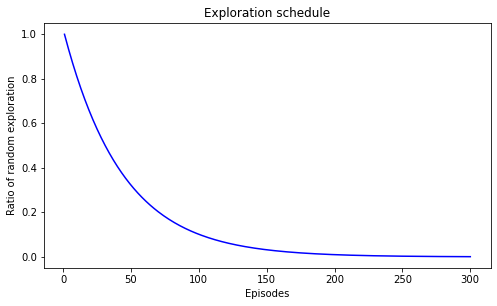

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [4]:
Single_Cross_Straight_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

TypeError: __init__() missing 2 required positional arguments: 'copy_weights_frequency' and 'epsilon_sequence'

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.load(300 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Straight_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.demo()

# Single_Cross_Triple 4 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3600

agent_type = "AC"
Session_ID = "Single_Cross_TripleAC4test1"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         }
    },
   'demand' : {"default" : [400,400,400,400] }
}

In [ ]:
gamma = 0.85
alpha = 0.00005


value = 0.5
entropy = 5000
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple4_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.demo()

# Single_Cross_Triple 4 action DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

Session_ID = "Single_Cross_Triple4_actions"
#Session_ID = "DQN"

agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 5

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.train(120)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.save()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.load(best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiDQN_Agents.test()

In [ ]:
# To be arranged for multy agents

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering all the junction

"""
Because the cars never leave the nodes the delay is not computed correctly (when the agent doesn't work) 
"""



In [ ]:
plt.figure(4)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].loss)

plt.figure(5)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)
print(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.demo()

# Single_Cross_Triple 8 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Triple8_actions_AC10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
gamma = 0.95
alpha = 0.000001


value = 5
entropy = 500
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple8_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple8_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.demo()

# Single_Cross_Triple 8 actions DQN

In [5]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [6]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

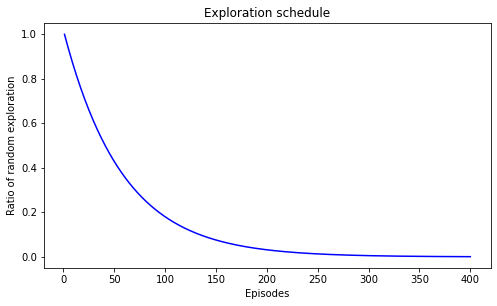

In [7]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [8]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

TypeError: __init__() missing 2 required positional arguments: 'copy_weights_frequency' and 'epsilon_sequence'

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.train(episodes) 

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Triple8_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

# Five intersection DQN

In [ ]:
model_name  = 'Five_intersection'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Five5transfert"

# all controller actions
Five_intersection_dictionary =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['11-1', '11-2', '11-3', '12-1', '12-2', '12-3', '13-1', '13-2', '13-3', '14-1', '14-2', '14-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]
         },
                  1 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['21-1', '21-2', '21-3', '22-1', '22-2', '22-3', '23-1', '23-2', '23-3', '24-1', '24-2', '24-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
        'queues_counter_ID' : [13,14,15,16,17,18,19,20,21,22,23,24]
         },
                  2 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['31-1', '31-2', '31-3', '32-1', '32-2', '32-3', '33-1', '33-2', '33-3', '34-1', '34-2', '34-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [25,26,27,28,29,30,31,32,33,34,35,36]
         },
                  3 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['41-1', '41-2', '41-3', '42-1', '42-2', '42-3', '43-1', '43-2', '43-3', '44-1', '44-2', '44-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
          'queues_counter_ID' : [37,38,39,40,41,42,43,44,45,46,47,48]
         },
                  4 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['51-1', '51-2', '51-3', '52-1', '52-2', '52-3', '53-1', '53-2', '53-3', '54-1', '54-2', '54-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [49,50,51,52,53,54,55,56,57,58,59,60]
         }
    },
   'demand' : { 'default' : [400,400,400,400,400,400,400,400,400,400,400,400],
             
             0 : [200,200,200,200,200,200,200,200,200,200,200,200],
             1 : [400,400,400,400,400,400,400,400,400,400,400,400],
             2 : [500,900,500,500,900,500,500,900,500,500,900,500],
             3 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             4 : [500,700,500,500,700,500,500,700,500,500,700,500],
             5 : [500,700,500,500,700,500,500,700,500,500,700,500],
             6 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             7 : [500,900,500,500,900,500,500,900,500,500,900,500],
             8 : [400,400,400,400,400,400,400,400,400,400,400,400],
             9 : [200,200,200,200,200,200,200,200,200,200,200,200]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Five_intersection_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Five_intersection_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Five_intersection_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Five_intersection_MultiDQN_Agents.train(episodes)

In [ ]:
Five_intersection_MultiDQN_Agents.save(401)
Five_intersection_MultiDQN_Agents.load(400,best = True)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[0].load_agent(vissim_working_directory, 'Single_Cross_Triple', 'Single_Cross_Triple8_actions',400 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Five_intersection_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]


# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        
    plt.xlabel('Time [s]')
    plt.ylabel('Queue Length')
    plt.title('Junction {} Queue length'.format(idx))
    plt.gca().legend(('West Queue','South Queue', 'East Queue', 'North Queue'))
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Delay')
    plt.title('Junction {} Delay'.format(idx))
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Stop Delay')
    plt.title('Junction {} Stop Delay'.format(idx))
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated Delay')
plt.title('Global accumulated Delay')
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated stop Delay')
plt.title('Global accumulated stop Delay')
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[2] = Five_intersection_MultiDQN_Agents.Agents[3]

In [ ]:
Five_intersection_MultiDQN_Agents.demo()